In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
import math
import pandas as pd 

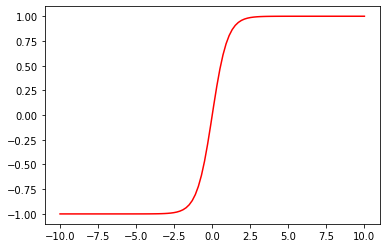

In [ ]:
#plotting tanh(x)
x = np.linspace(-10,10,100)
a=np.tanh(x)

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

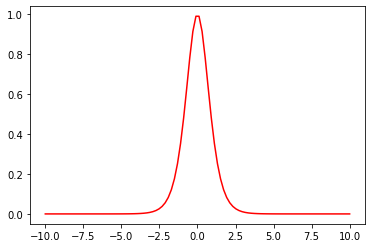

In [ ]:
#plotting derivative of tanh(x)
x = np.linspace(-10,10,100)
a=1-np.tanh(x)**2

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

(200, 2)
(200,)


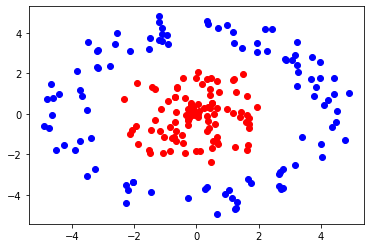

In [ ]:
np.random.seed(0)

def make_dataset(num_points):
    radius = 5
    data = []
    labels = []
    # Generate positive examples (labeled 1).
    for i in range(num_points // 2):
        r = np.random.uniform(0, radius*0.5)
        angle = np.random.uniform(0, 2*math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        data.append([x, y])
        labels.append(1)
        
    # Generate negative examples (labeled 0).
    for i in range(num_points // 2):
        r = np.random.uniform(radius*0.7, radius)
        angle = np.random.uniform(0, 2*math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        data.append([x, y])
        labels.append(0)
        
    data = np.asarray(data)
    labels = np.asarray(labels)
    return data, labels
    
num_data = 200
X, Y = make_dataset(num_data)
print(X.shape)
print(Y.shape)

# Note: red indicates a label of 1, blue indicates a label of 0
plt.scatter(X[:num_data//2, 0], X[:num_data//2, 1], color='red') 
plt.scatter(X[num_data//2:, 0], X[num_data//2:, 1], color='blue')    

In [ ]:
def loss_stable(z,t,N):
  return (1./N) * np.sum(t*np.logaddexp(0,-z) + (1-t)*np.logaddexp(0,z))

In [ ]:
def forward(X,U,b,W,c):    
    G = np.dot(X, U.T)  + b
    H = np.tanh(G)
    z = np.dot(H,W.T) + c
    y = sigmoid(z)
    
    return y,z,H,G

In [ ]:
#visualize the prediction
def visualize_weights(d,U,b,W,c,t):
  num_points = 200
  x1s = np.linspace(-6.0, 6.0, num_points)
  x2s = np.linspace(-6.0, 6.0, num_points)

  points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
  y,z,H,G = forward(points,U,b,W,c)
  y=y.reshape(num_points, num_points)
  X1, X2 = np.meshgrid(x1s, x2s)

  plt.pcolormesh(X1, X2, y, cmap=plt.cm.get_cmap('YlGn'))
  plt.colorbar()
  plt.scatter(d[:num_data//2, 0], d[:num_data//2, 1], color='red') 
  plt.scatter(d[num_data//2:, 0], d[num_data//2:, 1], color='blue') 

In [ ]:
def visualize_weights2(d,U,b,W,c,t):
  num_points = 200
  x1s = np.linspace(-6.0, 6.0, num_points)
  x2s = np.linspace(-6.0, 6.0, num_points)

  points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
  y,z,H,G = forward2(points,U,b,W,c)
  y=y.reshape(num_points, num_points)
  X1, X2 = np.meshgrid(x1s, x2s)

  plt.pcolormesh(X1, X2, y, cmap=plt.cm.get_cmap('YlGn'))
  plt.colorbar()
  plt.scatter(d[:num_data//2, 0], d[:num_data//2, 1], color='red') 
  plt.scatter(d[num_data//2:, 0], d[num_data//2:, 1], color='blue') 

In [ ]:
#Part 1
def grad_decent(x,t):
  N=x.shape[0]
  U = np.random.randn(3,2)
  b = np.zeros(3)
  W = np.random.randn(3)
  c = 0
  num_steps = 50000
  alpha = 1
  thresh=0.02
  for step in range(num_steps):
    y,z,H,G = forward(x,U,b,W,c)
    l= loss_stable(z,t,N)
    if (l<thresh):
      print('converged at step: ',step)
      break
    if (step % 1000==0):
      print (step,' loss = ',l)

    E_bar = 1
    z_bar = (1./N) * (y - t)
    W_bar = np.dot(H.T,z_bar)
    c_bar = np.dot(z_bar, np.ones(N))
    H_bar = np.outer(z_bar, W.T )
    G_bar = H_bar * (1 - np.tanh(G)**2)
    U_bar = np.dot(G_bar.T, x)
    b_bar = np.dot(G_bar.T , np.ones(N))
    
    U -= alpha * U_bar
    b -= alpha * b_bar
    W -= alpha * W_bar
    c -= alpha * c_bar
  
  return U,b,W,c

0  loss =  0.7053942635715975
1000  loss =  0.029621689200904428
converged at step:  1681


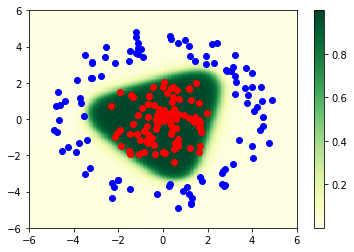

In [ ]:
#result of training
U,b,W,c=grad_decent(X,Y)
visualize_weights(X,U,b,W,c,Y)

loss=  0.04240905398454476


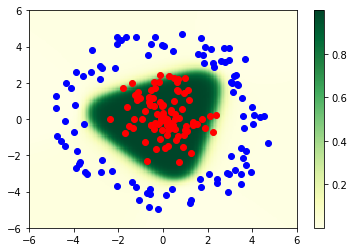

In [ ]:
#Validation using the weights trained
A,B = make_dataset(200)
y,z,H,G = forward(A,U,b,W,c)
print('loss= ',loss_stable(z,B,A.shape[0]))
visualize_weights(A,U,b,W,c,B)


In [ ]:
# PART 2
def forward2(X,U,b,W,c):    
    G = np.dot(X, U.T)  + b
    H = sigmoid(G)
    z = np.dot(H,W.T) + c
    y = sigmoid(z)
    
    return y,z,H,G

In [ ]:
#question 1
def modified_grad_decent(x,t):
  N=x.shape[0]
  U = np.random.randn(3,2)
  b = np.zeros(3)
  W = np.random.randn(3)
  c = 0
  num_steps = 50000
  alpha = 1
  thresh=0.02
  for step in range(num_steps):
    y,z,H,G = forward2(x,U,b,W,c)
    l= loss_stable(z,t,N)
    if (l<thresh):
      print('converged at step: ',step)
      break
    if (step % 1000==0):
      print (step,' loss = ',l)

    E_bar = 1
    z_bar = (1./N) * (y - t)
    #y_bar = (1./N) * (y.T - t)
    #z_bar = y_bar * (y.T*(1-y.T))
    W_bar = np.dot(H.T,z_bar)
    c_bar = np.dot(z_bar, np.ones(N))
    H_bar = np.outer(z_bar, W.T )
    G_bar = H_bar * (H*(1 - H))
    U_bar = np.dot(G_bar.T, x)
    b_bar = np.dot(G_bar.T , np.ones(N))
    
    U -= alpha * U_bar
    b -= alpha * b_bar
    W -= alpha * W_bar
    c -= alpha * c_bar
  
  return U,b,W,c

0  loss =  0.7102470891154047
1000  loss =  0.04603609122055371
2000  loss =  0.03124229814880474
3000  loss =  0.024410884012550236
converged at step:  3983


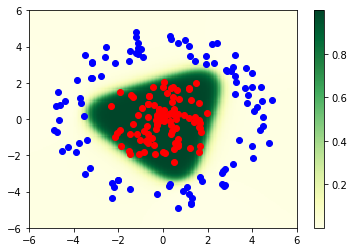

In [ ]:
#replaceing tanh with sigmoid
U,b,W,c=modified_grad_decent(X,Y)
visualize_weights2(X,U,b,W,c,Y)

In [ ]:
# Creating a new data set
def create_data_non_linear(s):
  a=np.random.random([int (s),2])*5
  b=np.zeros(int (s))
  for i in range(int(s)):
    if (a[i,0]*a[i,1]>= 5):
      b[i]=1
    else:
      b[i]= 0
  return a,b

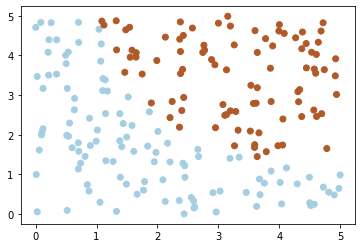

In [ ]:
#question 2
A,B=create_data_non_linear(200)
plt.scatter(A[:,0],A[:,1],c=B,cmap=plt.cm.Paired)

0  loss =  1.1467226586024017
1000  loss =  0.2649871173374632
2000  loss =  0.25656622024319037
3000  loss =  0.2564842639663112
4000  loss =  0.2564154085596493
5000  loss =  0.11322373903710567
6000  loss =  0.08219497507161166
7000  loss =  0.05110375988382483
8000  loss =  0.04100311257291204
9000  loss =  0.035255646169677364
10000  loss =  0.03125039404343656
11000  loss =  0.028329219795160027
12000  loss =  0.02607118321035378
13000  loss =  0.02434020571143038
14000  loss =  0.022925947424301676
15000  loss =  0.021696244089475177
16000  loss =  0.02058041830311717
converged at step:  16552


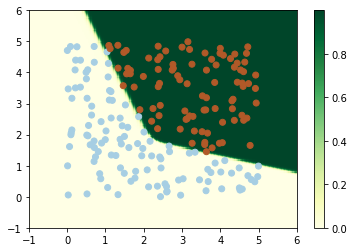

In [ ]:
# using MLP with tanh non linearity
U,b,W,c=grad_decent(A,B)
num_points = 200
x1s = np.linspace(-1.0, 6.0, num_points)
x2s = np.linspace(-1.0, 6.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
y,z,H,G = forward(points,U,b,W,c)
y=y.reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(A[:,0],A[:,1],c=B,cmap=plt.cm.Paired) 

0  loss =  1.0638085617742048
1000  loss =  0.05360193510249701
2000  loss =  0.03529326228749082
3000  loss =  0.027609280310000033
4000  loss =  0.024282528724464996
5000  loss =  0.022403807740430794
6000  loss =  0.021126287491021727
7000  loss =  0.0201722744408051
converged at step:  7212


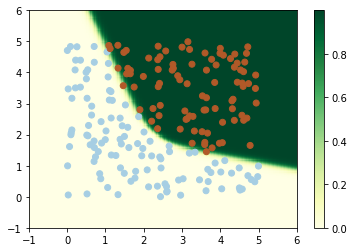

In [ ]:
# using MLP with sigmoid non linearity
U,b,W,c=modified_grad_decent(A,B)
num_points = 200
x1s = np.linspace(-1.0, 6.0, num_points)
x2s = np.linspace(-1.0, 6.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
y,z,H,G = forward2(points,U,b,W,c)
y=y.reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(A[:,0],A[:,1],c=B,cmap=plt.cm.Paired)

0  loss =  0.7730603281031572
converged at step:  162


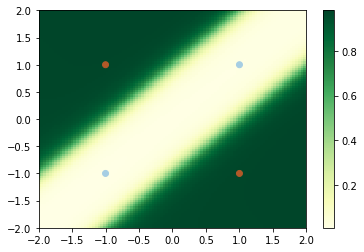

In [ ]:
#question 3
# XOR problem solved with MLP with tanh
x=np.array([[-1,-1,1,1],[-1,1,-1,1]])
t=np.array([0,1,1,0])
U,b,W,c=grad_decent(x.T,t)
num_points = 100
x1s = np.linspace(-2.0, 2.0, num_points)
x2s = np.linspace(-2.0, 2.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
y,z,H,G = forward(points,U,b,W,c)
y=y.reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(x.T[:,0],x.T[:,1],c=t,cmap=plt.cm.Paired)

0  loss =  0.7110256659564262
converged at step:  637


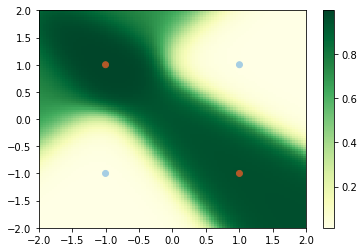

In [ ]:
# XOR problem solved with MLP with sigmoid
U,b,W,c=modified_grad_decent(x.T,t)
num_points = 100
x1s = np.linspace(-2.0, 2.0, num_points)
x2s = np.linspace(-2.0, 2.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
y,z,H,G = forward2(points,U,b,W,c)
y=y.reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(x.T[:,0],x.T[:,1],c=t,cmap=plt.cm.Paired)

In [ ]:
# PART 3


In [ ]:
def loss_reg(y,t,N):
  return (1/(2*N))*np.sum(np.square(y-t))

In [ ]:
def forward_reg(X,U,b,W,c):    
    G = np.dot(X, U.T)  + b
    H = G* (G>0)
    y = np.dot(H,W.T) + c
    
    return y,H,G

In [ ]:
def drelu(z):
  z[z<=0] = 0
  z[z>0] = 1
  return z

In [ ]:
#question 3
def grad_decent_reg(x,t,end):
  N=x.shape[0]
  U = np.random.randn(10,1)
  b = np.zeros(10)
  W = np.random.randn(10)
  c = 0
  num_steps =100000 
  alpha =0.0001
  thresh=end
  for step in range(num_steps):
    y,H,G = forward_reg(x,U,b,W,c)
    l= loss_reg(y,t,N)
    if (l<thresh):
      print('converged at step: ',step)
      break
    if (step % 5000==0):
      print (step,' loss = ',l)

    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_bar = np.dot(H.T,y_bar)
    c_bar = np.dot(y_bar, np.ones(N))
    H_bar = np.outer(y_bar, W.T )
    G_bar = H_bar * drelu(G)
    U_bar = np.dot(G_bar.T, x)
    b_bar = np.dot(G_bar.T , np.ones(N))
    
    U -= alpha * U_bar
    b -= alpha * b_bar
    W -= alpha * W_bar
    c -= alpha * c_bar
  
  return U,b,W,c

In [ ]:
# Linear regression with MLP
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')
X=np.zeros((len(data[:,0]),1))
for i in range(X.shape[0]):
  X[i,0] = data[i, 0]
Y = np.array(data[:, 1])


0  loss =  6934.755988803147
5000  loss =  56.209610246540244
10000  loss =  56.10561898135559
15000  loss =  56.006708602099714
20000  loss =  55.91102545452217
25000  loss =  55.81746588539917
30000  loss =  55.725686448143804
35000  loss =  55.63616075836849
40000  loss =  55.55016365907019
45000  loss =  55.46957982294378
50000  loss =  55.3965124221979
55000  loss =  55.332784094812595
60000  loss =  55.27950192654513
65000  loss =  55.236840534020914
70000  loss =  55.20409428696361
75000  loss =  55.179932760797804
80000  loss =  55.16273199010613
85000  loss =  55.15086609479388
90000  loss =  55.14289874898321
95000  loss =  55.137669390042866


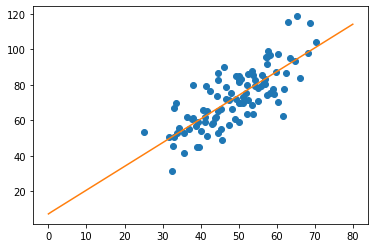

In [ ]:
#question 4
U,b,W,c=grad_decent_reg(X,Y,1)
num_points = 100
x1s = np.linspace(0, 80, num_points)
x1=x1s.reshape(num_points,1)

y,H,G = forward_reg(x1,U,b,W,c)
y=y.reshape(num_points)

plt.plot(X,Y,'o',x1s,y)


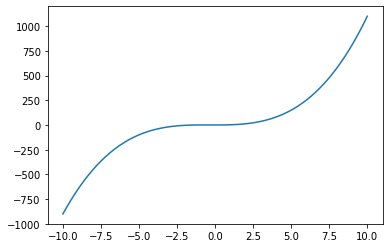

In [ ]:
# Polynomial regression with MLP
X = np.linspace(-10, 10, 100)
Y=X**2 + X**3
plt.plot(X,Y)
X=X.reshape(100,1)

0  loss =  77487.71595151862
5000  loss =  151.67923631037843
10000  loss =  63.45742756304314
15000  loss =  47.81666062792548
20000  loss =  42.47711026269241
25000  loss =  39.20958147898023
30000  loss =  36.71885317513155
35000  loss =  34.46809893539768
40000  loss =  32.277725188443306
45000  loss =  30.516253957470695
50000  loss =  28.992637748090193
55000  loss =  27.65650514077851
60000  loss =  26.468548835358273
65000  loss =  25.41072746620359
70000  loss =  24.471816238245943
75000  loss =  23.579537536314344
80000  loss =  22.74001615650102
85000  loss =  22.045289922725694
90000  loss =  21.45991804094105
95000  loss =  20.963024313295197


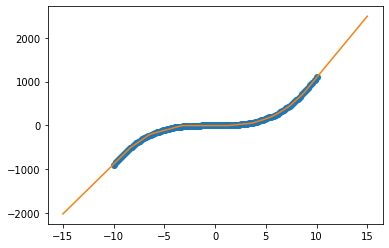

In [ ]:
#question 5
U,b,W,c=grad_decent_reg(X,Y,1)
num_points = 100
x1s = np.linspace(-15, 15, num_points)
x1=x1s.reshape(num_points,1)

y,H,G = forward_reg(x1,U,b,W,c)
y=y.reshape(num_points)

plt.plot(X,Y,'o',x1s,y)

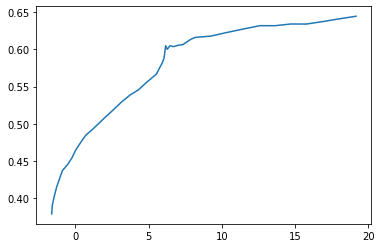

In [ ]:
# creating non linear regression dataset where x is temperature and y is sensor value  
xData = np.array([19.1647, 18.0189, 16.9550, 15.7683, 14.7044, 13.6269, 12.6040, 11.4309, 10.2987, 9.23465, 8.18440, 7.89789, 7.62498, 7.36571, 7.01106, 6.71094, 6.46548, 6.27436, 6.16543, 6.05569, 5.91904, 5.78247, 5.53661, 4.85425, 4.29468, 3.74888, 3.16206, 2.58882, 1.93371, 1.52426, 1.14211, 0.719035, 0.377708, 0.0226971, -0.223181, -0.537231, -0.878491, -1.27484, -1.45266, -1.57583, -1.61717])
yData = np.array([0.644557, 0.641059, 0.637555, 0.634059, 0.634135, 0.631825, 0.631899, 0.627209, 0.622516, 0.617818, 0.616103, 0.613736, 0.610175, 0.606613, 0.605445, 0.603676, 0.604887, 0.600127, 0.604909, 0.588207, 0.581056, 0.576292, 0.566761, 0.555472, 0.545367, 0.538842, 0.529336, 0.518635, 0.506747, 0.499018, 0.491885, 0.484754, 0.475230, 0.464514, 0.454387, 0.444861, 0.437128, 0.415076, 0.401363, 0.390034, 0.378698])
plt.plot(xData,yData)
# scaling up Y as it is very small and will not give proper loss reading which will lead to a overall worse prediction.
yData=yData*10
xData=xData.reshape(np.size(xData),1)

0  loss =  856.913952917865
5000  loss =  1.5830354771786623
10000  loss =  0.3118231649087916
15000  loss =  0.07609840239883482
20000  loss =  0.042003728249800636
25000  loss =  0.035747541022642514
30000  loss =  0.03371495549306322
35000  loss =  0.03247296557100752
40000  loss =  0.03152393034465068
45000  loss =  0.0307126588984401
50000  loss =  0.030124633256523196
55000  loss =  0.029707340091012502
60000  loss =  0.029344636488690252
65000  loss =  0.02908214546232768
70000  loss =  0.028836600923247295
75000  loss =  0.028602322945085586
80000  loss =  0.02837797591086051
85000  loss =  0.028162874022562904
90000  loss =  0.027953835423012042
95000  loss =  0.02774697545304954
[[ 0.340079  ]
 [ 0.4160244 ]
 [ 0.68599534]
 [ 0.58330325]
 [-0.6874954 ]
 [ 0.86155374]
 [ 0.98196637]
 [-1.38591617]
 [ 2.34750207]
 [ 1.70973284]] [-0.1629812   0.18454949  1.10937389 -0.21403425  0.70069914  0.73030069
 -0.93061245 -0.06249299  0.10797563 -0.05135049] [-0.3136266   0.27402141  1.

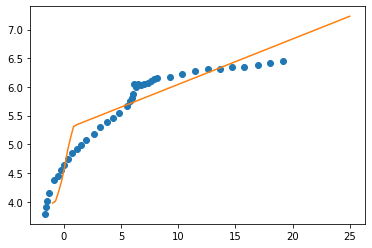

In [ ]:
#question 6
# Non-Linear regression with MLP
U,b,W,c=grad_decent_reg(xData,yData,0.001)
print(U,b,W,c)
num_points = 100
x1s = np.linspace(-1, 25, num_points)
x1=x1s.reshape(num_points,1)

y,H,G = forward_reg(x1,U,b,W,c)
y=y.reshape(num_points)

plt.plot(xData,yData,'o',x1s,y)